In [66]:
#### Your code here
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
from scipy.stats import (spearmanr,skew)
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn import linear_model
from sklearn.linear_model import (LinearRegression,Ridge,RidgeCV,LassoCV,ElasticNetCV,Lasso,LassoLarsCV)
from sklearn.decomposition import PCA

from sklearn.preprocessing import (scale,LabelEncoder)
from collections import Counter
from sklearn.model_selection import(cross_val_score,cross_val_predict,train_test_split,StratifiedKFold,GridSearchCV,KFold)
from sklearn.feature_selection import(SelectKBest,VarianceThreshold,chi2)
from sklearn.ensemble import(RandomForestRegressor,GradientBoostingRegressor)
from sklearn.metrics import(mean_absolute_error,mean_squared_error,r2_score,explained_variance_score)

In [67]:
#Read In Data
train = pd.read_csv('clean_train.csv')

In [68]:
outlier = np.log(4000)
train = train[(train['GrLivArea']<outlier)]

In [69]:
train.shape

(1456, 85)

In [70]:
y_target = train["SalePrice"]
y_target = np.log(y_target.astype(float)) 
y_target_df = pd.Series.to_frame(y_target)

In [71]:
train_ID = train['Id']
x_features = train.copy()
x_features.drop("Id", axis = 1, inplace = True)
x_features.drop('SalePrice', axis=1, inplace = True)
x_features.drop('Unnamed: 0', axis=1, inplace = True)

In [72]:
print(y_target.shape)
print(x_features.shape)

(1456,)
(1456, 82)


In [49]:
X_features = pd.get_dummies(x_features,drop_first=True)

In [50]:
# for c in X_train.columns:
#     if X_train[c].dtype == 'object':
#         print(c, len(X_train[c].value_counts()))

In [51]:
#pd.set_option('display.max_columns', 100)
X_features.columns.values.tolist()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'X1stFlrSF',
 'X2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'YrSold_Garage_Difference',
 'hasPool',
 'hasFence',
 'TotalHalfBath',
 'TotalFullBath',
 'TotalFinSF',
 'AbvGrndRoomSize',
 'MSSubClass_1-Story (Newer)',
 'MSSubClass_1-Story (Older)',
 'MSSubClass_2-story (Newer)',
 'MSSubClass_2-story (Older)',
 'MSSubClass_Duplex',
 'MSSubClass_Project

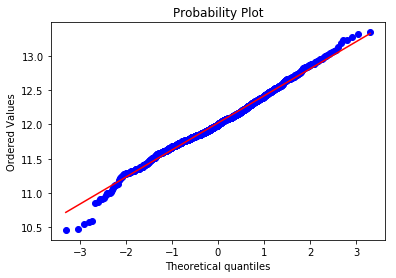

In [52]:
stats.probplot(y_target_df['SalePrice'], plot=plt)
plt.show()

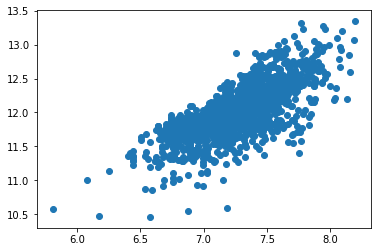

In [53]:
fig = plt.figure()
plt.scatter(X_features["GrLivArea"], y_target_df["SalePrice"])
plt.show()

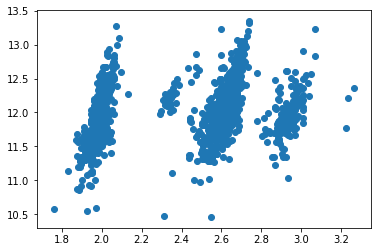

In [54]:
plt.scatter(X_features["TotalFinSF"], y_target_df["SalePrice"])
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.20, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


#print('Weight coefficients: ', regressor.coef_)
#print('y-axis intercept: ', regressor.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
correlation=X_train.corr()

In [75]:
correlation.to_csv("correlation.csv")

#lOT Frontage -> Lot Area
#Overall Qual _> Overall Qual / Exterior Qual, BsmtQual, GrLivArea, Kitchen Qual



PermissionError: [Errno 13] Permission denied: 'correlation.csv'

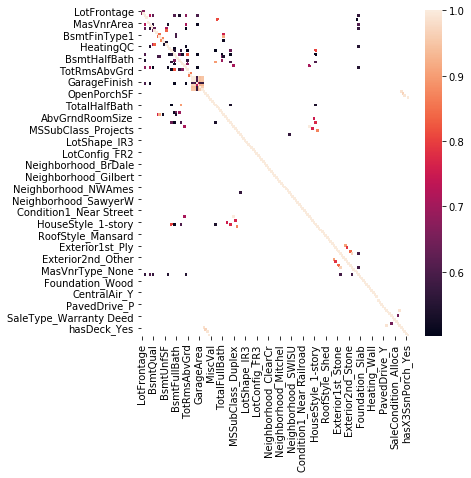

In [292]:
# cor=correlation[correlation>.50][:]
# cor.dropna(axis=1,how='all',inplace=True)
# imp_feature=cor.columns

# #Remove year columns from features
# cor.drop(cor.filter(like ='Year').columns,axis=1,inplace=True)
# imp_feature=cor.columns
# imp_feature

# imp_feature=imp_feature[:len(imp_feature)-1]
# lr = linear_model.LinearRegression()
# predicted = cross_val_predict(lr, X_train[imp_feature], y_train, cv=10)
# predicted_score = cross_val_score(lr,  X_train[imp_feature], y_train, cv=10)
# predicted_score.mean()

# #strong correlation cut-off
# a=0.25

# #cutoff value for features variance(features with lower variance than this number will be dropped)
# b=0.015

# strong_corrs=sorted_corrs[sorted_corrs>a]
# corrmatrix=train_subset[strong_corrs.index].corr()
#fig,ax=plt.subplots(figsize=(8,6))
sb.heatmap(cor)
plt.show()

In [235]:
# plt.plot(X_train, y_train, 'o')
# plt.show()
y_pred_train = regressor.predict(X_train)
#plt.plot(X_train, y_train, 'o', label="data")
#plt.plot(X_train, y_pred_train, 'o', label="prediction")
regressor.score(X_test, y_test)

0.90411435159505138

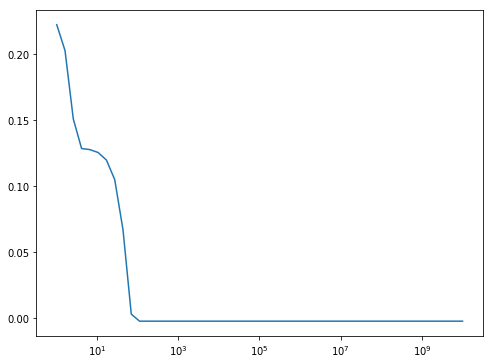

In [156]:
lasso = Lasso(random_state=42)
alphas = np.logspace(.01,10)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.show()

In [157]:
# ##Train_Test Split
# for i in range(5):
#     stratify_divide = StratifiedKFold(n_splits=5, random_state=i)
#     clf=linear_model.Lasso(alpha=0.1)
#     clf.fit
# #X_train, X_test, y_train, y_test = train_test_split(X, y)
#     cross_val_score(estimator=Lasso, X=x_train, y=y_train, cv=stratify_divide)

In [158]:
# Lasso CV
model_lasso = LassoCV(normalize=True, cv=6).fit(X_train, y_train)
print(rmse_cv(model_lasso).mean())
model_lasso.score(X_test, y_test)

C:\Users\raj-t\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'rmse_cv' is not defined

In [ ]:
# Calculate RMSE
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
preds = pd.DataFrame({"preds":model_lasso.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [160]:
# Elastic Net CV
elastic_net = ElasticNetCV(alphas=[.001])
elastic_net.fit(X_train, y_train)

C:\Users\raj-t\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=[0.001], copy_X=True, cv=None, eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [ ]:
# rf = RandomForestRegressor()
# parameters = {"max_depth": [9,10,11,12],
#               "min_samples_split" :[2,3,4,5,6],
#               "n_estimators" : [100,500],
#               "max_features": (4,5,6)}

# grid_search = GridSearchCV(rf, parameters, n_jobs=3, cv=5)
# grid_search.fit(X_train,y_train)

In [ ]:
print(mean_squared_error(y_test, combined_pred))
print(mean_squared_error(y_test, elastic_net.predict(X_test)))
print(mean_squared_error(y_test, model_lasso.predict(X_test)))
print(mean_squared_error(y_test, model_xgb.predict(X_test)))

In [ ]:
#Ridge Regression

In [164]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [165]:
model_ridge = Ridge()

In [166]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

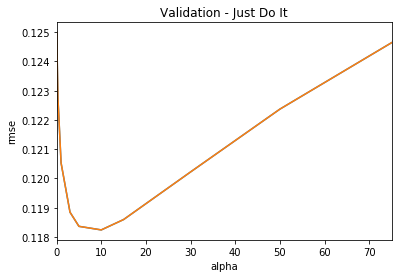

In [169]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [168]:
cv_ridge.min()

0.11824094683352224

In [236]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [237]:
rmse_cv(model_lasso).mean()

0.11822846427050664

In [238]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [249]:
#coef[coef>0].count()
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 64 variables and eliminated the other 103 variables


In [252]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

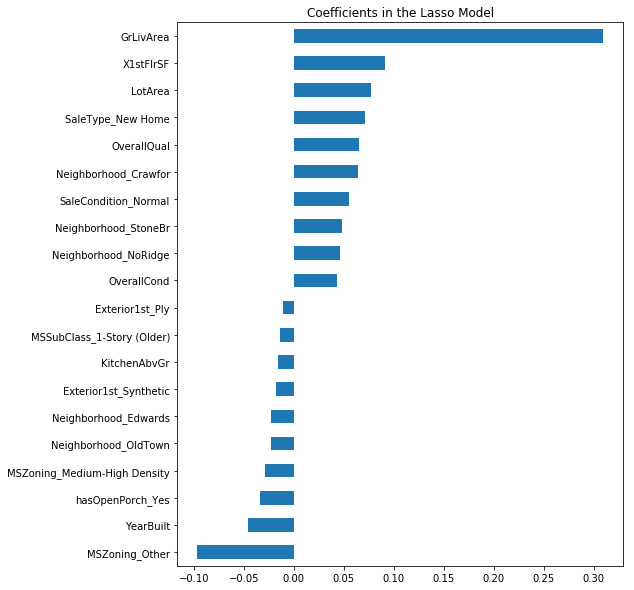

In [254]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

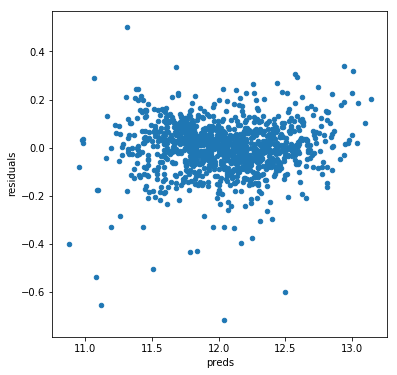

In [265]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.show()